In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_58895/4135472531.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#import data 
import datetime



data = pd.read_csv("weather_data.csv")

# Rename the columns
data = data.rename(columns={
    'LST_DATE': 'Date',
    'T_DAILY_MAX': 'MaxTemperature',
    'T_DAILY_MIN': 'MinTemperature',
    'T_DAILY_AVG': 'AvgTemperature',
    'P_DAILY_CALC': 'Precipitation'
})
# Remove the unnamed column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# # Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format= '%Y%m%d')
data['Year'] = data['Date'].dt.year

# Replace all occurrences of -9999 with NaN
data.replace(-9999, pd.NA, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

data

,Date,MaxTemperature,MinTemperature,AvgTemperature,Precipitation,Year
0,2014-01-01,8.7,-1.8,2.9,0.0,2014
1,2014-01-02,4.0,-1.1,0.8,5.5,2014
2,2014-01-03,-0.7,-9.5,-6.4,0.0,2014
3,2014-01-04,1.0,-9.8,-4.5,0.0,2014
4,2014-01-05,5.6,-1.3,1.4,14.5,2014
...,...,...,...,...,...,...
3647,2023-12-27,10.3,7.0,8.8,12.1,2023
3648,2023-12-28,11.9,5.9,9.5,0.0,2023
3649,2023-12-29,7.5,2.6,5.2,1.6,2023
3650,2023-12-30,8.0,2.0,4.1,0.0,2023


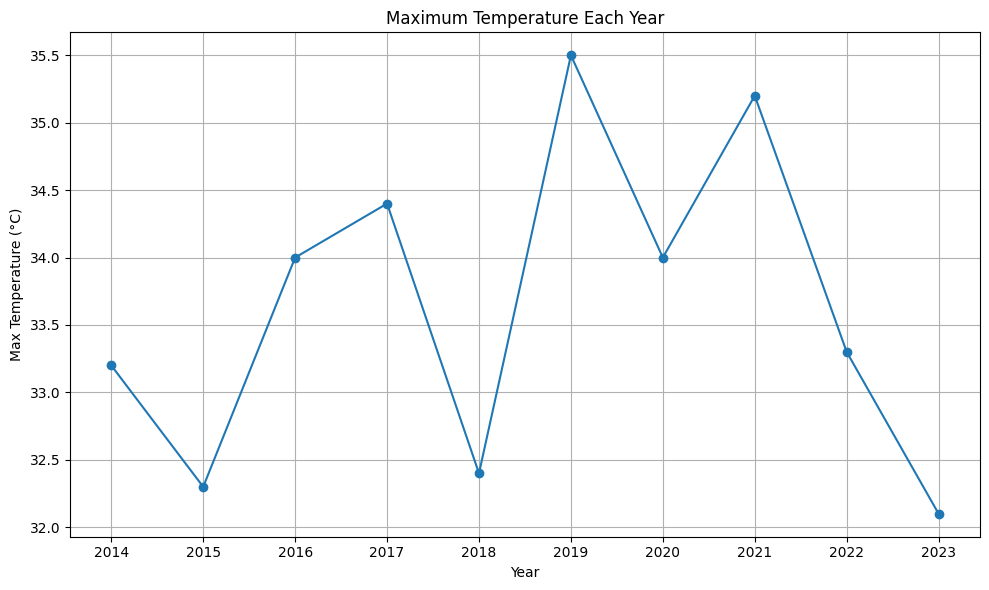

In [3]:
#MAX TEMPERATURE FOR EACH YEAR 
import datetime
import pandas as pd


# Group by year and calculate the maximum temperature for each year
max_temp_yearly = data.groupby('Year')['MaxTemperature'].max()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(max_temp_yearly.index, max_temp_yearly.values, marker='o', linestyle='-')
plt.title('Maximum Temperature Each Year')
plt.xlabel('Year')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.xticks(max_temp_yearly.index)  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

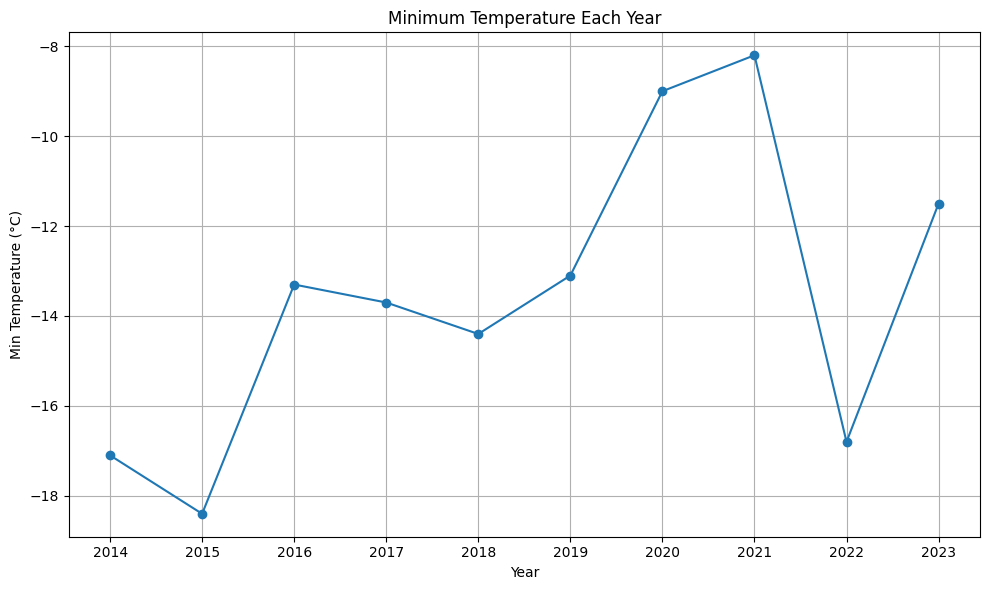

In [4]:
#MIN TEMPERATURE FOR EACH YEAR 
import datetime
import pandas as pd


# Group by year and calculate the maximum temperature for each year
min_temp_yearly = data.groupby('Year')['MinTemperature'].min()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(min_temp_yearly.index, min_temp_yearly.values, marker='o', linestyle='-')
plt.title('Minimum Temperature Each Year')
plt.xlabel('Year')
plt.ylabel('Min Temperature (°C)')
plt.grid(True)
plt.xticks(min_temp_yearly.index)  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

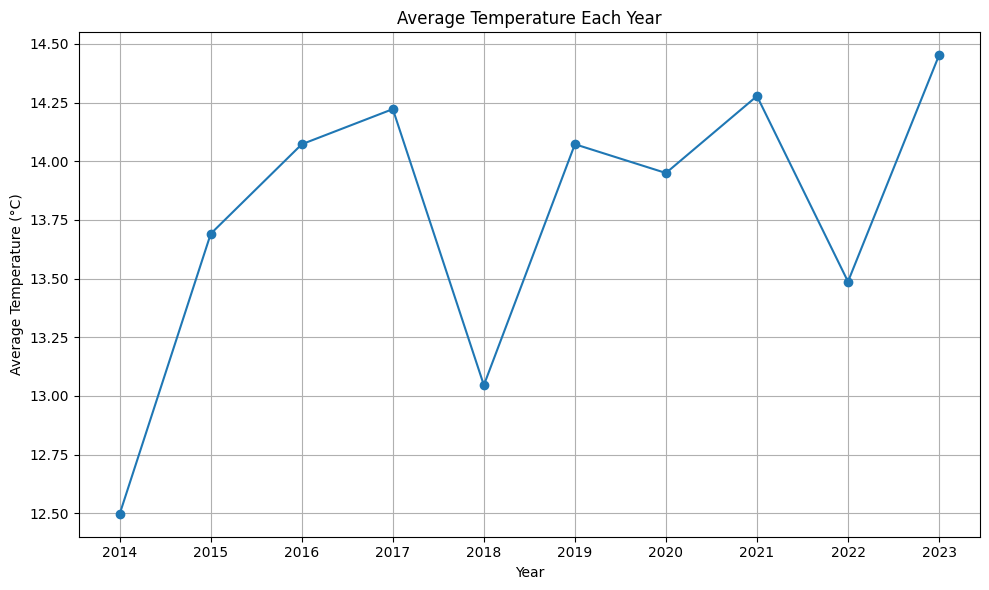

In [5]:
#AVG TEMPERATURE FOR EACH YEAR
import datetime
import pandas as pd


# Group by year and calculate the maximum temperature for each year
avg_temp_yearly = data.groupby('Year')['AvgTemperature'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_yearly.index, avg_temp_yearly.values, marker='o', linestyle='-')
plt.title('Average Temperature Each Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(avg_temp_yearly.index)  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

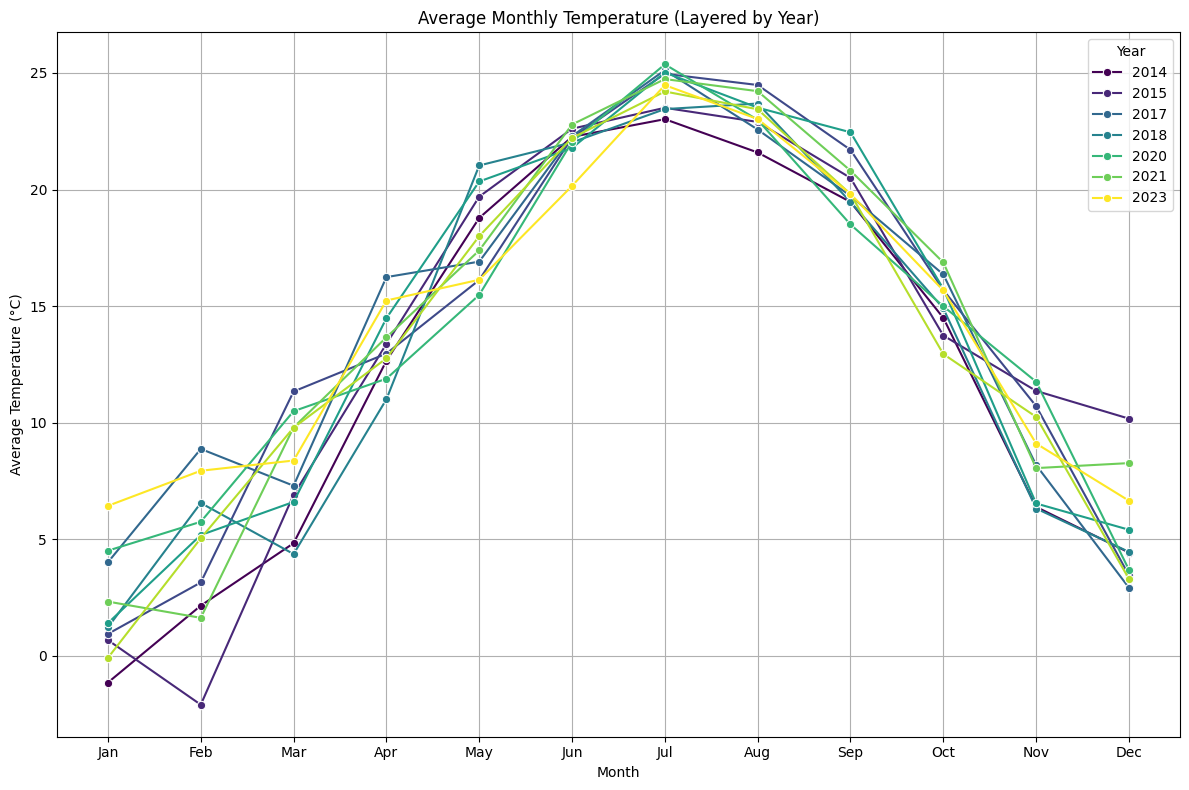

In [6]:
#AVG TEMPERATURE MONTHL, lAYERED

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month from the date column
data['Month'] = data['Date'].dt.month

# Group by year and month, calculate the average temperature for each group
avg_temp_monthly = data.groupby(['Year', 'Month'])['AvgTemperature'].mean().reset_index()

# Plot the graph
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_temp_monthly, x='Month', y='AvgTemperature', hue='Year', palette='viridis', marker='o')
plt.title('Average Monthly Temperature (Layered by Year)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Year', loc='upper right')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

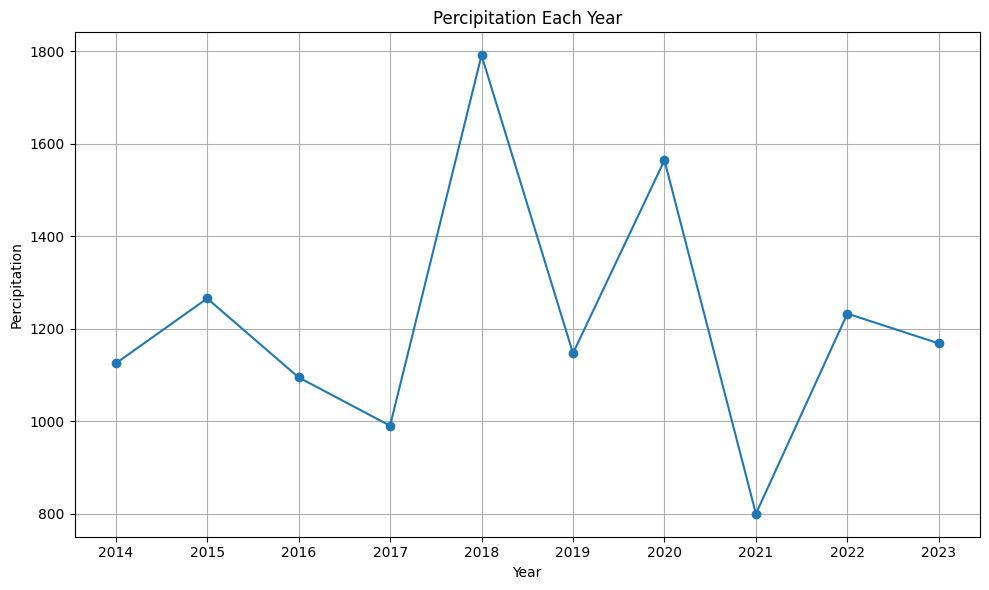

In [7]:
#MIN TEMPERATURE FOR EACH YEAR 
import datetime
import pandas as pd


# Group by year and calculate the maximum temperature for each year
per_yearly = data.groupby('Year')['Precipitation'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(per_yearly.index, per_yearly.values, marker='o', linestyle='-')
plt.title('Percipitation Each Year')
plt.xlabel('Year')
plt.ylabel('Percipitation')
plt.grid(True)
plt.xticks(per_yearly.index)  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

In [8]:

minTemp = data['MinTemperature'].astype(float)
maxTemp = data['MaxTemperature'].astype(float)
avgTemp = data['AvgTemperature'].astype(float)
prec = data['Precipitation'].astype(float)

def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

features = pd.concat([minTemp, maxTemp,avgTemp, prec], axis=1)
features.index = data["Date"]

features = normalize(features.values)
features = pd.DataFrame(features)

features

,0,1,2,3
0,-1.262379,-1.084601,-1.229416,-0.356242
1,-1.183847,-1.604693,-1.466724,0.227850
2,-2.126227,-2.124785,-2.280352,-0.356242
3,-2.159884,-1.936667,-2.065644,-0.356242
4,-1.206285,-1.427640,-1.398922,1.183638
...,...,...,...,...
3625,-0.275124,-0.907548,-0.562694,0.928761
3626,-0.398530,-0.730495,-0.483591,-0.356242
3627,-0.768751,-1.217390,-0.969507,-0.186325
3628,-0.836064,-1.162061,-1.093812,-0.356242


In [9]:
#Split into training and validation, allocate 80% to training

training_size = int ( 0.8 * features.shape[0])  
train_data = features.loc[0 : training_size - 1]
val_data = features.loc[training_size:]

In [10]:
#use the entirety of the data, predict 50 years into the future (365 x 50)
start = 0
end = features.shape[0] - (365*50)

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = 365 * 50

In [11]:
from tensorflow import keras

##Training Dataset
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    sampling_rate=1,
    batch_size=64,
)

In [12]:
print(val_data)

             0         1         2         3
2904 -1.688694 -1.328048 -1.670131  4.592615
2905 -1.733569 -2.080522 -1.930040 -0.356242
2906 -1.486755 -1.106732 -1.353720 -0.356242
2907 -1.329692 -1.206324 -1.093812 -0.228804
2908 -2.002820 -2.257575 -2.043044 -0.058886
...        ...       ...       ...       ...
3625 -0.275124 -0.907548 -0.562694  0.928761
3626 -0.398530 -0.730495 -0.483591 -0.356242
3627 -0.768751 -1.217390 -0.969507 -0.186325
3628 -0.836064 -1.162061 -1.093812 -0.356242
3629 -0.925815 -1.073535 -1.003408 -0.356242

[726 rows x 4 columns]


In [13]:
#Validation dataset. 
#Take last 18,250 rows out beacuase there wont be label info for those entries 
x_val_end = len(val_data) - start

label_start = training_size + start



x_val = val_data.iloc[:x_val_end][[i for i in range(4)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=1,
    batch_size=64,
)



In [21]:
#extract single batch from training dataset, use it to have the 
#output and input layer dimension
import keras

for batch in dataset_train.take(1):
    inputs, targets = batch
    
    inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    lstm_out = keras.layers.LSTM(32)(inputs)
    outputs = keras.layers.Dense(1)(lstm_out)

    model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()

2024-03-19 12:41:47.473170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
#fit the model using the training/validation datasets
history = model.fit(

    dataset_train,
    epochs=15,
    validation_data=dataset_val
)

loss = history.history["loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
minTemp_mean = minTemp.mean(axis=0)
minTemp_std = minTemp.std(axis=0)

for x, y in dataset_val.skip(12):
    history_data = x[0][:, 1].numpy() * minTemp_std + minTemp_mean
    true_value = y[0].numpy() * minTemp_std + minTemp_mean
    prediction = model.predict(x)[0] * minTemp_std + minTemp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(36, true_value, "gD")
    plt.plot(36, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    break

In [ ]:
##LSTM PREDICTIONS, MIN TEMP
# Preprocess the data
# Assuming the temperature data is in a column named 'Temperature'

#Extracts the minimum temperature data, reshapes it to single column array
minTemp = data['MinTemperature'].values.reshape(-1, 1)

# Normalize the data, use min-max scaling to be sure all values fall between 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data_normalized = scaler.fit_transform(minTemp)

# Split the data into train and test sets, 80% train, 20% test
train_size = int(len(temperature_data_normalized) * 0.80)
test_size = len(temperature_data_normalized) - train_size
train_data, test_data = temperature_data_normalized[0:train_size, :], temperature_data_normalized[train_size:len(temperature_data_normalized), :]

# Convert the data into sequences, 12 = n steps for each sequence (months)
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12  # You can adjust this parameter to change the number of time steps
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model- 2 LSTM layers and a dense layyer, compiled with adam optimizer & mean squared error loss function
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, 50 epochs, 32 batch size 
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions for the next 5 years (60 months)
next_5_years_predictions = []

# Use the last n_steps data points as input for prediction
last_data = temperature_data_normalized[-n_steps:, :].reshape((1, n_steps, 1))

#predicts next month's temperature based on previous months temperature 
for _ in range(60):  # Predicting for 60 months (5 years)
    next_month_prediction = model.predict(last_data)
    next_5_years_predictions.append(next_month_prediction[0, 0])
    last_data = np.roll(last_data, -1, axis=1)  # Shift the data one month forward
    last_data[0, -1, 0] = next_month_prediction  # Update the last value with the predicted value

# Inverse transform predictions to bring back to original scale
next_5_years_predictions = scaler.inverse_transform(np.array(next_5_years_predictions).reshape(-1, 1))

# Extract minimum temperature for each year
min_temperatures = []
for i in range(5):
    min_temperature = np.min(next_5_years_predictions[i * 12: (i + 1) * 12])
    min_temperatures.append(min_temperature)

print(min_temperatures)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm_12" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [ ]:
##LSTM PREDICTIONS, MAX TEMP
# Preprocess the data
# Assuming the temperature data is in a column named 'Temperature'

maxTemp = data['MaxTemperature'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data_normalized = scaler.fit_transform(maxTemp)

# Split the data into train and test sets
train_size = int(len(temperature_data_normalized) * 0.80)
test_size = len(temperature_data_normalized) - train_size
train_data, test_data = temperature_data_normalized[0:train_size, :], temperature_data_normalized[train_size:len(temperature_data_normalized), :]

# Convert the data into sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 12  # You can adjust this parameter to change the number of time steps
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions for the next 5 years (60 months)
next_5_years_predictions = []

# Use the last n_steps data points as input for prediction
last_data = temperature_data_normalized[-n_steps:, :].reshape((1, n_steps, 1))

for _ in range(60):  # Predicting for 60 months (5 years)
    next_month_prediction = model.predict(last_data)
    next_5_years_predictions.append(next_month_prediction[0, 0])
    last_data = np.roll(last_data, -1, axis=1)  # Shift the data one month forward
    last_data[0, -1, 0] = next_month_prediction  # Update the last value with the predicted value

# Inverse transform predictions
next_5_years_predictions = scaler.inverse_transform(np.array(next_5_years_predictions).reshape(-1, 1))

# Extract maximum temperature for each year
max_temperatures = []
for i in range(5):
    max_temperature = np.max(next_5_years_predictions[i * 12: (i + 1) * 12])
    max_temperatures.append(max_temperature)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0956
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084
Epoch 15/50
 1/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0087

KeyboardInterrupt: 

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0917
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064
Epoch 16/50
91/91 ━━━━━━━━━━━━

/var/folders/6g/7fqxn4216jl8m88cxmwr0rdh0000gn/T/ipykernel_67488/3646808491.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data_avg[0, -1, 0] = next_month_prediction_avg  # Update the last value with the predicted value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

([<matplotlib.axis.XTick at 0x29ac2bc90>,
 [Text(0, 0, '2023'),
  Text(1, 0, '2024'),
  Text(2, 0, '2025'),
  Text(3, 0, '2026'),
  Text(4, 0, '2027')])

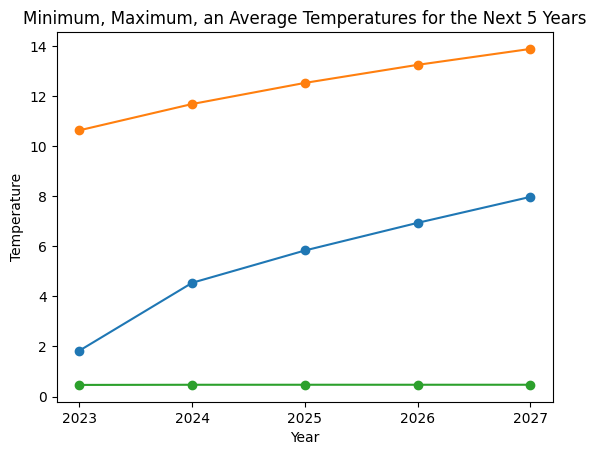

In [ ]:
##LSTM PREDICTIONS, AVG TEMP
# Preprocess the data
# Assuming the temperature data is in a column named 'Temperature'

avgTemp = data['AvgTemperature'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
avg_normalized = scaler.fit_transform(avgTemp)

# Split the data into train and test sets
train_size = int(len(avg_normalized) * 0.80)
test_size = len(avg_normalized) - train_size
train_data_avg, test_data_avg = avg_normalized[0:train_size, :], avg_normalized[train_size:len(avg_normalized), :]

# Convert the data into sequences
# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps), 0])
#         y.append(data[i + n_steps, 0])
#     return np.array(X), np.array(y)

n_steps = 12  # You can adjust this parameter to change the number of time steps
X_train_avg, y_train_avg = create_sequences(train_data_avg, n_steps)
X_test_avg, y_test_avg = create_sequences(test_data_avg, n_steps)

# Reshape the data for LSTM input (samples, time steps, features)
X_train_avg = np.reshape(X_train_avg, (X_train_avg.shape[0], X_train_avg.shape[1], 1))
X_test_avg = np.reshape(X_test_avg, (X_test_avg.shape[0], X_test_avg.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_avg, y_train_avg, epochs=50, batch_size=32)

# Make predictions for the next 5 years (60 months)
next_5_years_predictions = []

# Use the last n_steps data points as input for prediction
last_data_avg = temperature_data_normalized[-n_steps:, :].reshape((1, n_steps, 1))

for _ in range(60):  # Predicting for 60 months (5 years)
    next_month_prediction_avg = model.predict(last_data_avg)
    next_5_years_predictions.append(next_month_prediction_avg[0, 0])
    last_data_avg = np.roll(last_data, -1, axis=1)  # Shift the data one month forward
    last_data_avg[0, -1, 0] = next_month_prediction_avg  # Update the last value with the predicted value

# Inverse transform predictions
next_5_years_predictions_avg = scaler.inverse_transform(np.array(next_5_years_predictions).reshape(-1, 1))

# Extract maximum temperature for each year
avg_temperatures = []
for i in range(5):
    avg_temperature = np.max(next_5_years_predictions[i * 12: (i + 1) * 12])
    avg_temperatures.append(avg_temperature)

# Plot the minimum and maximum temperatures for the next 5 years
plt.plot(min_temperatures, marker='o', label='Min Temperature')
plt.plot(max_temperatures, marker='o', label='Max Temperature')
plt.plot(avg_temperatures, marker='o', label='Avg Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Minimum, Maximum, an Average Temperatures for the Next 5 Years')
plt.xticks(range(5), [year for year in range(2023, 2028)])

In [ ]:
print(max_temperatures)
print(avg_temperatures)
print(min_temperatures)

[10.632985, 11.682714, 12.526015, 13.2472925, 13.883192]
[0.46270236, 0.4688354, 0.46964255, 0.46974912, 0.46976325]
[1.3255963, 0.7294499, 0.20548065, -0.16163643, -0.41319978]
